<a href="https://colab.research.google.com/github/princeKike27/Fifa-World-Cup/blob/main/FIFA_World_Cup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The FIFA World Cup

Is an international fútbol competition where 32 countries qualify to send teams made up of the best players from that nation to compete against each other for the World Cup championship.

The World Cup championship has been awarded every four years since the inaugural tournament in 1930, except in 1942 and 1946 when it was not held because of the Second World War.The current format of the tournament involves 32 teams competing for the title at venues within the host nation over a period of one month.

In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Countries who have Won the World Cup!!!

In [2]:
# load dataset 
worldcups = 'https://raw.githubusercontent.com/princeKike27/Fifa-World-Cup/main/WorldCups.csv'
df_worldcups = pd.read_csv(worldcups)
df_worldcups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [3]:
# check 'Winner' column
df_worldcups['Winner'].unique()


array(['Uruguay', 'Italy', 'Germany FR', 'Brazil', 'England', 'Argentina',
       'France', 'Spain', 'Germany'], dtype=object)

In [4]:
# standarize Germany FR to Germany
for index in df_worldcups.index:
  if df_worldcups.loc[index, 'Winner'] == 'Germany FR':
    df_worldcups.loc[index, 'Winner'] = 'Germany'

In [5]:
df_worldcups['Winner'].unique()

array(['Uruguay', 'Italy', 'Germany', 'Brazil', 'England', 'Argentina',
       'France', 'Spain'], dtype=object)

In [6]:
# groupby Winner
cup_winners = df_worldcups.groupby('Winner').Country.count().reset_index()
cup_winners.rename(columns={'Country': 'Winner Counter'}, inplace=True)
cup_winners

,Winner,Winner Counter
0,Argentina,2
1,Brazil,5
2,England,1
3,France,1
4,Germany,4
5,Italy,4
6,Spain,1
7,Uruguay,2


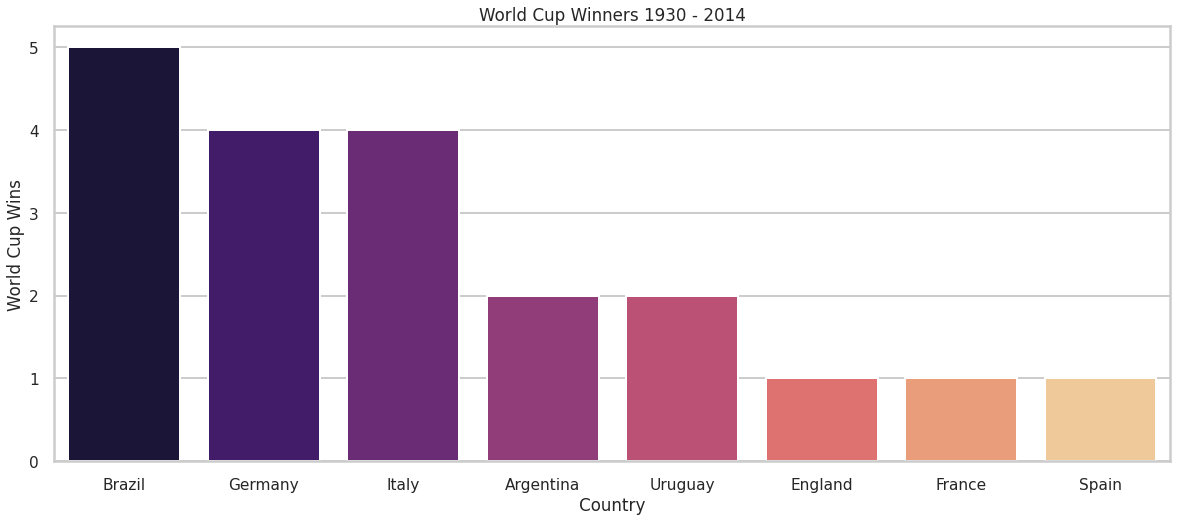

In [25]:
# most World Cup Winners graph
plt.figure(figsize=(20,8))
ax = plt.subplot()

# set style
sns.set_context('poster', font_scale=0.7)
sns.set_style('whitegrid')

sns.barplot(data=cup_winners, x='Winner', y='Winner Counter', ci=None, palette='magma',
            order=cup_winners.sort_values(by='Winner Counter', ascending=False).Winner)

plt.ylabel('World Cup Wins')
plt.xlabel('Country')
plt.title('World Cup Winners 1930 - 2014')
plt.show()


# Matches Played per World Cup

In [8]:
# matches played & qualified teams per World Cup
matches_played = df_worldcups[['Year', 'MatchesPlayed', 'QualifiedTeams']]
matches_played.head()

,Year,MatchesPlayed,QualifiedTeams
0,1930,18,13
1,1934,17,16
2,1938,18,15
3,1950,22,13
4,1954,26,16


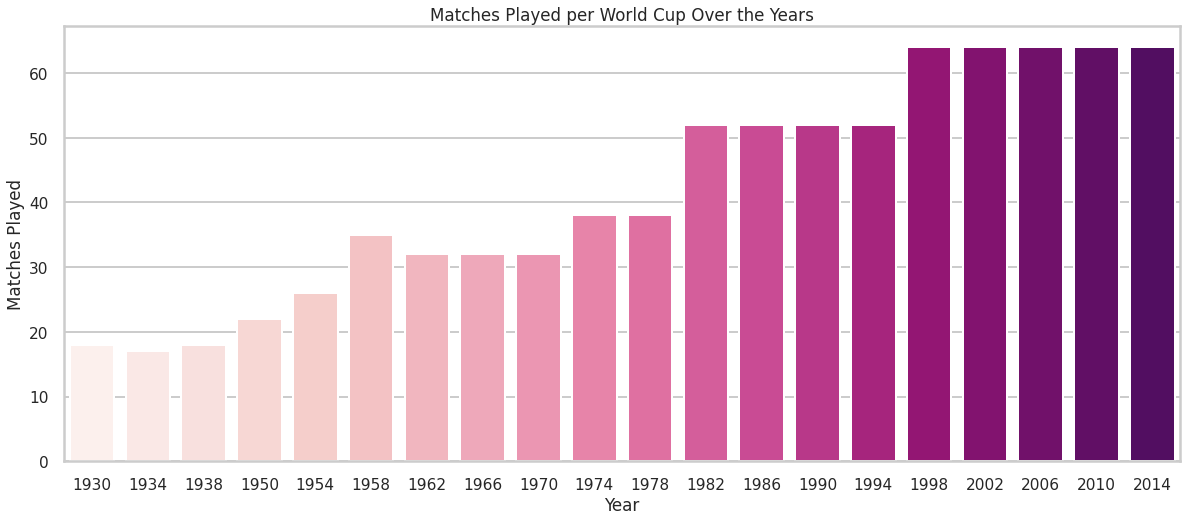

In [9]:
# matches played graph
plt.figure(figsize=(20,8))
ax = plt.subplot()

# style graph
sns.set_context('poster', font_scale=0.7)

sns.barplot(data=matches_played, x='Year', y='MatchesPlayed', ci=None, palette='RdPu')

plt.ylabel('Matches Played')
plt.title('Matches Played per World Cup Over the Years')
plt.show()

# Teams Qualified to World Cup Over the Years

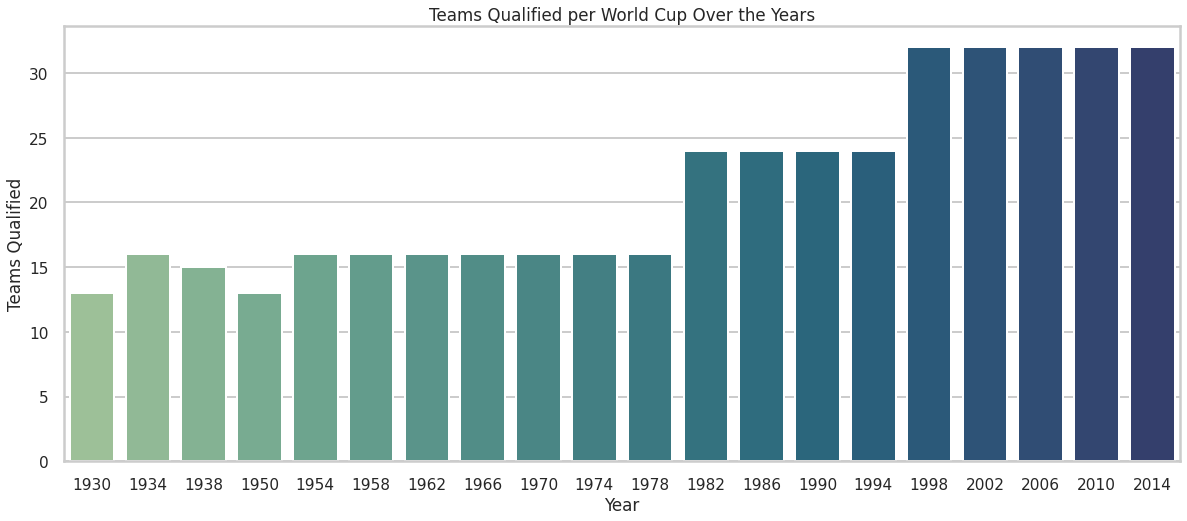

In [10]:
# teams qualified graph 
plt.figure(figsize=(20,8))
ax = plt.subplot()

# style graph
sns.set_context('poster', font_scale=0.7)

sns.barplot(data=matches_played, x='Year', y='QualifiedTeams', palette='crest', ci=None)

plt.ylabel('Teams Qualified')
plt.title('Teams Qualified per World Cup Over the Years')
plt.show()

# World Cup Matches

In [11]:
# load dataset
wc_matches = 'https://raw.githubusercontent.com/princeKike27/Fifa-World-Cup/main/WorldCupMatches.csv'
df_matches = pd.read_csv(wc_matches)
df_matches.head()


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [12]:
# since goals scored are divided between Home and Away Teams create column 'Total Goals'
df_matches['Total Goals'] = df_matches['Home Team Goals'] + df_matches['Away Team Goals']
df_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Total Goals
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,5.0
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,3.0
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,3.0
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,4.0
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,1.0


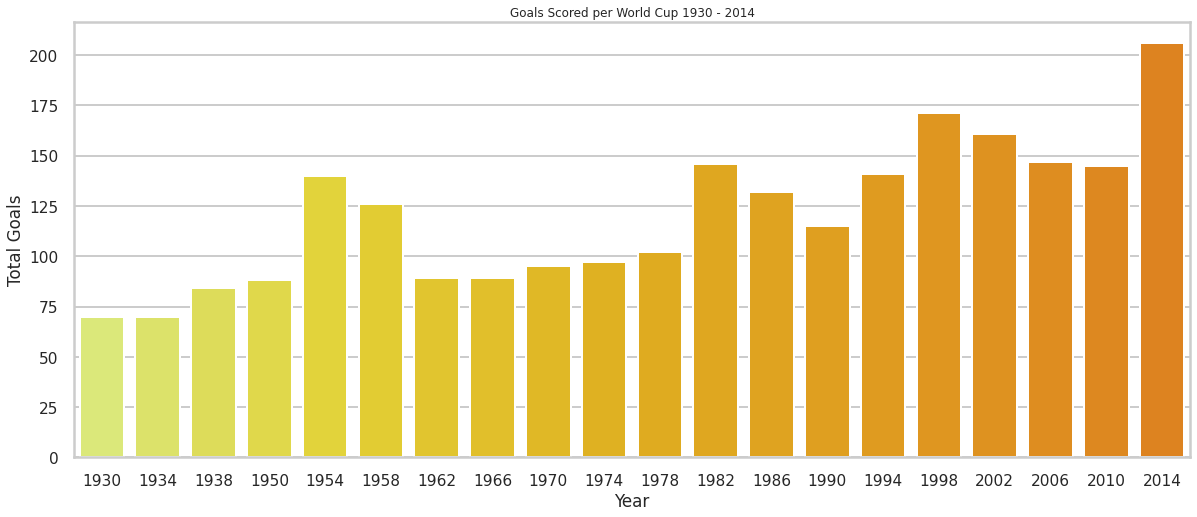

<Figure size 432x288 with 0 Axes>

In [13]:
# Number of goals scored in the World Cup each year

plt.figure(figsize=(20, 8))
ax = plt.subplot()

# set plot style
sns.set_style('whitegrid')

# set display size
sns.set_context('poster', font_scale=0.5)

# plot barplot >> total goals scored per World Cup 
sns.barplot(data=df_matches, x='Year', y='Total Goals', estimator=sum, palette='Wistia', ci=None)

# set x_ticks
years = ['1930', '1934', '1938', '1950', '1954', '1958', '1962', 
          '1966', '1970', '1974', '1978', '1982', '1986', '1990', 
          '1994', '1998', '2002', '2006', '2010', '2014']
ax.set_xticks(list(range((20))))
ax.set_xticklabels(years)


plt.title('Goals Scored per World Cup 1930 - 2014')
plt.show()
plt.savefig('Goals_Scored_WC.png')

# Average Goals per Match

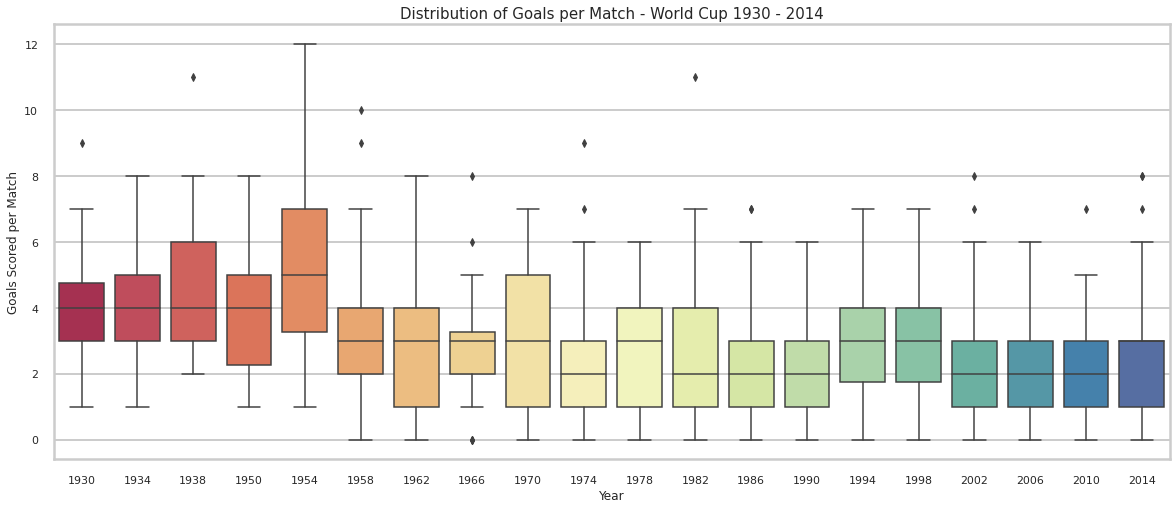

In [14]:
# boxplot to show how goals are distributed
plt.figure(figsize=(20, 8))
ax = plt.subplot()

# set display size
sns.set_context('notebook', font_scale=1.25)

sns.boxplot(data=df_matches, x='Year', y='Total Goals', palette='Spectral')

# set x_ticks
years = ['1930', '1934', '1938', '1950', '1954', '1958', '1962', 
          '1966', '1970', '1974', '1978', '1982', '1986', '1990', 
          '1994', '1998', '2002', '2006', '2010', '2014']
ax.set_xticks(list(range((20))))
ax.set_xticklabels(years)



plt.ylabel('Goals Scored per Match')
plt.title('Distribution of Goals per Match - World Cup 1930 - 2014')
plt.show()


# AVG Goals Scored Per Team

In [15]:
# standarize countries names 

for index in df_matches.index:
  if df_matches.loc[index, 'Home Team Name'] == "C�te d'Ivoire":
    df_matches.loc[index, 'Home Team Name'] = "Cote d'Ivoire"
  elif df_matches.loc[index, 'Home Team Name'] == 'rn">Bosnia and Herzegovina':
    df_matches.loc[index, 'Home Team Name'] = 'Bosnia and Herzegovina'
  elif df_matches.loc[index, 'Home Team Name'] == 'rn">Republic of Ireland':
    df_matches.loc[index, 'Home Team Name'] = 'Republic of Ireland'
  elif df_matches.loc[index, 'Home Team Name'] == 'rn">Serbia and Montenegro':
    df_matches.loc[index, 'Home Team Name'] = 'Serbia and Montenegro'
  elif df_matches.loc[index, 'Home Team Name'] == 'rn">Trinidad and Tobago':
    df_matches.loc[index, 'Home Team Name'] = 'Trinidad and Tobago'
  elif df_matches.loc[index, 'Home Team Name'] == 'rn">United Arab Emirates':
    df_matches.loc[index, 'Home Team Name'] = 'United Arab Emirates'

In [16]:
# list of unique countries that have participated in the tournament
unique_countries = df_matches['Home Team Name'].unique()
unique_countries = np.delete(unique_countries, -1)
unique_countries.sort()
unique_countries

array(['Algeria', 'Angola', 'Argentina', 'Australia', 'Austria',
       'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'Bulgaria', 'Cameroon', 'Canada', 'Chile', 'China PR', 'Colombia',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Czechoslovakia', 'Denmark', 'Ecuador', 'England', 'France',
       'German DR', 'Germany', 'Germany FR', 'Ghana', 'Greece', 'Haiti',
       'Honduras', 'Hungary', 'IR Iran', 'Iran', 'Iraq', 'Italy',
       'Jamaica', 'Japan', 'Korea DPR', 'Korea Republic', 'Mexico',
       'Morocco', 'Netherlands', 'New Zealand', 'Nigeria',
       'Northern Ireland', 'Norway', 'Paraguay', 'Peru', 'Poland',
       'Portugal', 'Republic of Ireland', 'Romania', 'Russia',
       'Saudi Arabia', 'Scotland', 'Senegal', 'Serbia',
       'Serbia and Montenegro', 'Slovakia', 'Slovenia', 'South Africa',
       'Soviet Union', 'Spain', 'Sweden', 'Switzerland', 'Togo',
       'Trinidad and Tobago', 'Tunisia', 'Turkey', 'USA', 'Ukrai

In [17]:
# function to store data from a country
def country_info(country, dataset):
  # store dataframe with information of the country as home team
  df_country_home = dataset[dataset['Home Team Name'] == country]
  # create column for the goals scored as home team
  df_country_home['Country Goals'] = df_country_home['Home Team Goals']
  # store information with country as away team
  df_country_away = dataset[dataset['Away Team Name'] == country]
  df_country_away['Country Goals'] = df_country_away['Away Team Goals']

  # merge dataframes on top of each other
  df_country = pd.concat([df_country_home, df_country_away], axis=0).reset_index()
  df_country['Year'] = df_country['Year'].astype(int)

  return df_country

In [18]:
# function to plot avg number of goals a team scored in a match per World Cup participation
def avg_goals_scored(country_info):

  country_name = country_info.loc[0, 'Home Team Name']

  # plot graph
  plt.figure(figsize=(20,8))
  ax = plt.subplot()

  # set display size
  sns.set_style('whitegrid')
  sns.set_context('poster', font_scale=0.6)

  sns.barplot(data=country_info, x='Year', y='Country Goals', palette='Greens', ci=None)

  plt.ylabel('Avg Goals per Match')
  plt.title('{} Avg Goals per Match on World Cups'.format(country_name))
  plt.show()
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


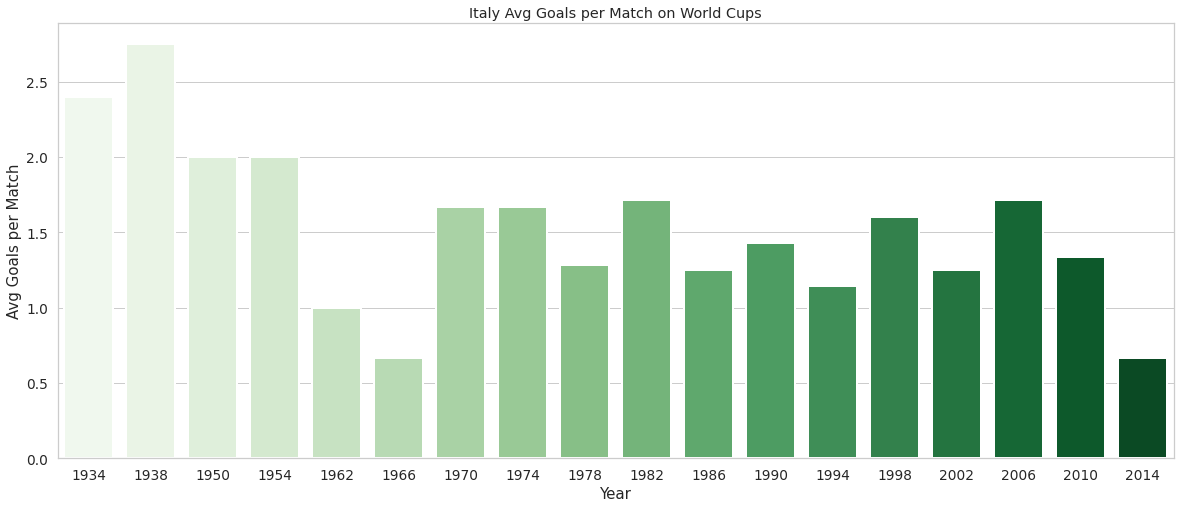

In [19]:
# function test
test_country = country_info('Italy', df_matches)
test_avg_goals_scored = avg_goals_scored(test_country)

# Goals Scored per Team

In [20]:
# function to plot total number of goals a team scored in a World Cup participation
def total_goals_scored(country_info):

  country_name = country_info.loc[0, 'Home Team Name']

  # plot graph
  plt.figure(figsize=(20,8))
  ax = plt.subplot()

  # set display size
  sns.set_style('whitegrid')
  sns.set_context('poster', font_scale=0.6)

  sns.barplot(data=country_info, x='Year', y='Country Goals', palette='Reds', estimator=sum, ci=None)

  plt.ylabel('Total Goals Scored')
  plt.title('{} Goals Scored per World Cup'.format(country_name))
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


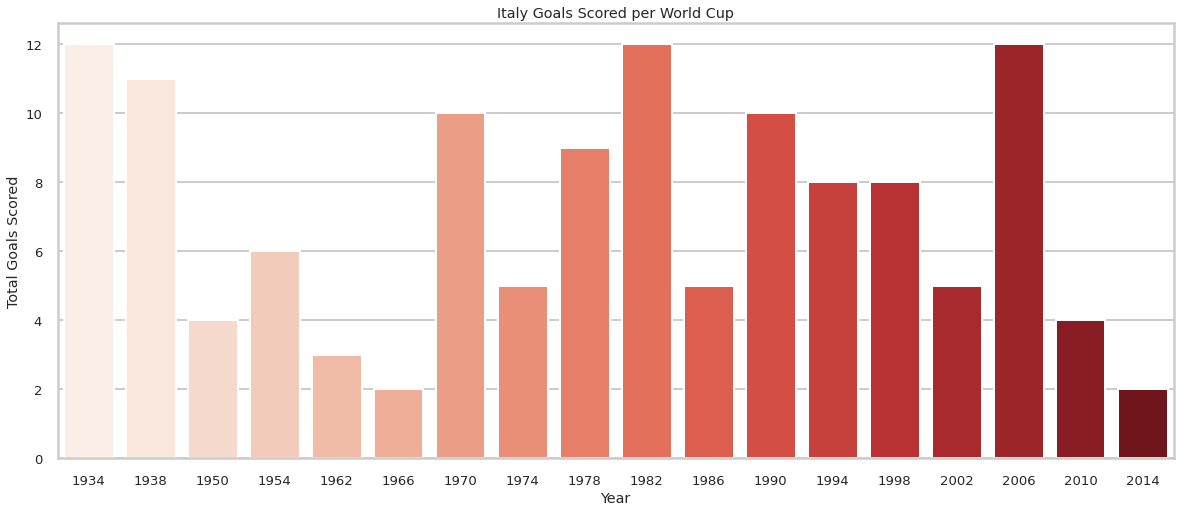

In [21]:
test_country = country_info('Italy', df_matches)
test_goals_scored = total_goals_scored(test_country)

# Goals Scored on Knockout Stages 

In [22]:
# check unique values of 'Stage' column
df_matches['Stage'].unique()

array(['Group 1', 'Group 4', 'Group 2', 'Group 3', 'Semi-finals', 'Final',
       'Preliminary round', 'Quarter-finals', 'Match for third place',
       'First round', 'Group 6', 'Group B', 'Group A', 'Group 5',
       'Group C', 'Group D', 'Group F', 'Group E', 'Round of 16',
       'Group H', 'Group G', 'Third place', 'Play-off for third place',
       nan], dtype=object)

In [23]:
# store info of knockout stages
knockout_stages = df_matches[
                             (df_matches['Stage'] == 'Round of 16') | 
                             (df_matches['Stage'] == 'Quarter-finals') |
                             (df_matches['Stage'] == 'Semi-finals') |
                             (df_matches['Stage'] == 'Final')].reset_index()
                             
knockout_stages['Year'] = knockout_stages['Year'].astype(int)                             
knockout_stages.head()

,index,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Total Goals
0,15,1930,26 Jul 1930 - 14:45,Semi-finals,Estadio Centenario,Montevideo,Argentina,6.0,1.0,USA,,72886.0,1.0,0.0,LANGENUS Jean (BEL),VALLEJO Gaspar (MEX),WARNKEN Alberto (CHI),202.0,1088.0,ARG,USA,7.0
1,16,1930,27 Jul 1930 - 14:45,Semi-finals,Estadio Centenario,Montevideo,Uruguay,6.0,1.0,Yugoslavia,,79867.0,3.0,1.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),BALWAY Thomas (FRA),202.0,1101.0,URU,YUG,7.0
2,17,1930,30 Jul 1930 - 14:15,Final,Estadio Centenario,Montevideo,Uruguay,4.0,2.0,Argentina,,68346.0,1.0,2.0,LANGENUS Jean (BEL),SAUCEDO Ulises (BOL),CRISTOPHE Henry (BEL),405.0,1087.0,URU,ARG,6.0
3,26,1934,31 May 1934 - 16:30,Quarter-finals,Stadio Benito Mussolini,Turin,Czechoslovakia,3.0,2.0,Switzerland,,12000.0,1.0,1.0,BERANEK Alois (AUT),MOHAMED Youssuf (EGY),BAERT Jacques (FRA),418.0,1143.0,TCH,SUI,5.0
4,27,1934,31 May 1934 - 16:30,Quarter-finals,San Siro,Milan,Germany,2.0,1.0,Sweden,,3000.0,0.0,0.0,BARLASSINA Rinaldo (ITA),MERCET Rene (SUI),VAN MOORSEL Johannes (NED),418.0,1129.0,GER,SWE,3.0


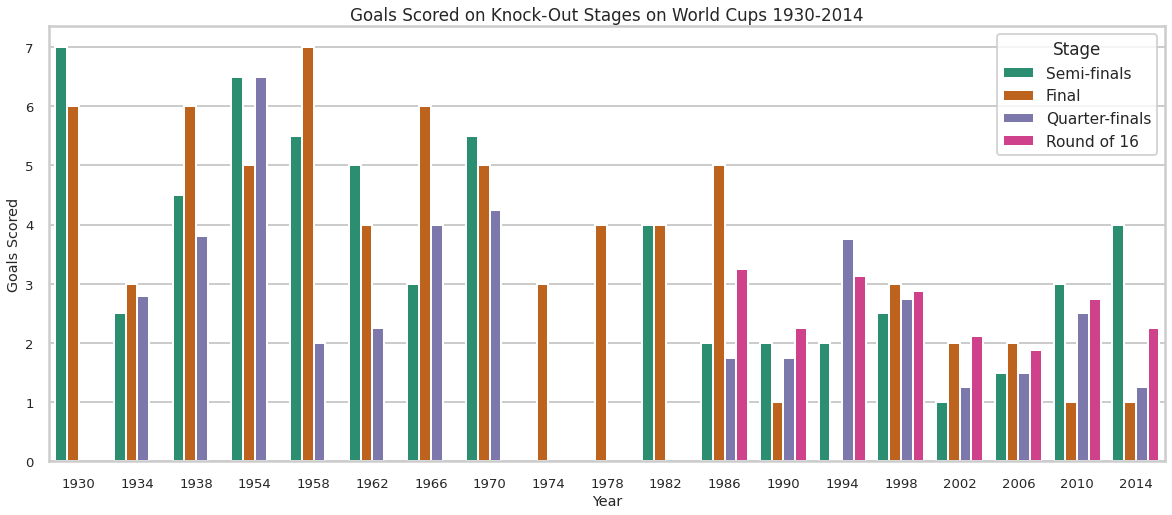

In [24]:
# total goals scored on knockout stages
plt.figure(figsize=(20,8))
ax = plt.subplot()

# set style
sns.set_context('poster', font_scale=0.7)

sns.barplot(data=knockout_stages, x='Year', y='Total Goals', hue='Stage', palette='Dark2', ci=None)

plt.ylabel('Goals Scored')
plt.title('Goals Scored on Knock-Out Stages on World Cups 1930-2014')
plt.show()
